In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
properties=pd.read_csv('../input/properties_2016.csv',dtype={"censustractandblock":np.str, 'rawcensustractandblock':np.str})

/home/spark/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
properties.shape

(2985217, 58)

In [4]:
properties.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid         ...           numberofstories  \
0                NaN         NaN         ...                       NaN   
1                NaN         NaN         ...                       NaN   
2                NaN         NaN         ...                       NaN   
3                NaN         NaN         ...                       1.0   
4                NaN         NaN         ...                       NaN   

   fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0            NaN                         NaN                9.0   
1            NaN                         NaN            27516.0   
2            NaN                    650756.0          1413387.0   
3            NaN                    571346.0          1156834.0   
4            NaN                    193796.0           433491.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0          2015.0                    9.0        NaN                 NaN   
1          2015.0                27516.0        NaN                 NaN   
2          2015.0               762631.0   20800.37                 NaN   
3          2015.0               585488.0   14557.57                 NaN   
4          2015.0               239695.0    5725.17                 NaN   

   taxdelinquencyyear  censustractandblock  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 58 columns]

In [43]:
train=pd.read_csv('../input/train_2016_v2.csv')

In [44]:
train.shape

(90275, 3)

In [45]:
train.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

In [46]:
train.parcelid.value_counts().shape

(90150,)

In [47]:
trainids=(set(train.parcelid))

In [48]:
properties['intrain']=properties.parcelid.isin(trainids)

In [51]:
[u for u in zip(properties.columns,properties.dtypes) if u[1]!=np.float64]

[('parcelid', dtype('int64')),
 ('hashottuborspa', dtype('O')),
 ('propertycountylandusecode', dtype('O')),
 ('propertyzoningdesc', dtype('O')),
 ('rawcensustractandblock', dtype('O')),
 ('fireplaceflag', dtype('O')),
 ('taxdelinquencyflag', dtype('O')),
 ('censustractandblock', dtype('O')),
 ('intrain', dtype('bool'))]

In [11]:
cols=properties.columns

In [13]:
def show(col,nan_val=-100, trans=None ):
    def f(v):
        v=v[col]
        r1= v.value_counts()
        #print r
        return r1,r1/float(v.shape[0])
    
    v = properties[[col,'intrain']].copy()
    v = v.fillna(nan_val)
    print v[col].dtype

    if trans: v[col]=trans(v[col])
    cnta,a=f(v)
    cntb,b=f(v[v.intrain])
    cntc,c=f(v[~v.intrain])
    r= pd.concat([a,b,c,b/c,cnta,cntb,cntc],axis=1)
    r.columns=['total','train','non-train' ,'train/non-train','#total','#train','#non-train']
    return r
 

In [14]:
def f_combine(s,m,t=None):
    assert(t is not None)
    def f(v):
        if v in m:
            return m[v]
        else:
            return v
    return s.astype(t).apply(f)

In [107]:
show(cols[22]).dropna()

hashottuborspa


total     train  non-train  train/non-train   #total  #train  \
-100  0.976881  0.973942   0.976974         0.996897  2916203   88319   
True  0.023119  0.026058   0.023026         1.131657    69014    2363   

      #non-train  
-100     2827884  
True       66651

In [52]:
train_properties = properties[properties.intrain]
train_properties.shape

(90150, 59)

In [53]:
vc=train_properties[cols[32]].value_counts()
codes=set(vc[vc>100].index)
str(codes)

"set(['1128', '1129', '0400', '1111', '010V', '1', '1110', '01DC', '012C', '0200', '010E', '010D', '010C', '0300', '01HC', '0104', '0101', '0100', '122', '96', '38', '34'])"

In [54]:
def trans_propertycountylandusecode(s):
    codes=set(['1128', '1129', '0400', '1111', '010V', '1', '1110', '01DC', '012C', '0200', '010E', '010D', '010C', '0300', '01HC', '0104', '0101', '0100', '122', '96', '38', '34'])
    s=s.copy()
    s[~s.isin(codes)]="XXXX"
    return s
show(cols[32],trans=trans_propertycountylandusecode) 

object


total     train  non-train  train/non-train   #total  #train  \
0100  0.386537  0.341675   0.387934         0.880756  1153896   30802   
0101  0.082907  0.082341   0.082924         0.992962   247494    7423   
0104  0.004686  0.003860   0.004711         0.819328    13988     348   
010C  0.075509  0.113744   0.074318         1.530498   225410   10254   
010D  0.020268  0.024493   0.020136         1.216356    60503    2208   
010E  0.017077  0.025302   0.016821         1.504236    50978    2281   
010V  0.001011  0.002230   0.000973         2.290593     3019     201   
012C  0.002737  0.005801   0.002642         2.195786     8172     523   
01DC  0.002146  0.002784   0.002126         1.309387     6407     251   
01HC  0.000982  0.001642   0.000961         1.707817     2931     148   
0200  0.035043  0.023816   0.035393         0.672898   104612    2147   
0300  0.012035  0.006389   0.012210         0.523270    35926     576   
0400  0.010995  0.008275   0.011079         0.746904    32821     746   
1     0.020155  0.032324   0.019776         1.634497    60167    2914   
1110  0.012851  0.012368   0.012866         0.961313    38363    1115   
1111  0.042372  0.043050   0.042351         1.016508   126491    3881   
1128  0.003156  0.003938   0.003132         1.257493     9421     355   
1129  0.010515  0.018214   0.010276         1.772530    31391    1642   
122   0.174910  0.170372   0.175052         0.973265   522145   15359   
34    0.041286  0.065846   0.040522         1.624952   123249    5936   
38    0.001660  0.001176   0.001675         0.702160     4954     106   
96    0.001904  0.001131   0.001928         0.586818     5684     102   
XXXX  0.039258  0.009229   0.040194         0.229616   117195     832   

      #non-train  
0100     1123094  
0101      240071  
0104       13640  
010C      215156  
010D       58295  
010E       48697  
010V        2818  
012C        7649  
01DC        6156  
01HC        2783  
0200      102465  
0300       35350  
0400       32075  
1          57253  
1110       37248  
1111      122610  
1128        9066  
1129       29749  
122       506786  
34        117313  
38          4848  
96          5582  
XXXX      116363

In [55]:
show(cols[33]).dropna()

float64


total     train  non-train  train/non-train   #total   #train  \
31.0   0.003170  0.000189   0.003262         0.057802     9462     17.0   
47.0   0.001445  0.000011   0.001490         0.007446     4314      1.0   
246.0  0.038486  0.026290   0.038865         0.676424   114888   2370.0   
247.0  0.013407  0.006955   0.013608         0.511116    40022    627.0   
248.0  0.013508  0.009717   0.013626         0.713117    40325    876.0   
260.0  0.000923  0.000688   0.000930         0.739621     2754     62.0   
261.0  0.719667  0.671681   0.721161         0.931388  2148362  60552.0   
263.0  0.019576  0.000921   0.020157         0.045677    58438     83.0   
264.0  0.000068  0.000122   0.000067         1.830325      204     11.0   
265.0  0.003156  0.003938   0.003132         1.257493     9421    355.0   
266.0  0.161150  0.252790   0.158296         1.596942   481067  22789.0   
267.0  0.000609  0.000311   0.000618         0.502621     1817     28.0   
269.0  0.020591  0.025879   0.020426         1.266939    61469   2333.0   
275.0  0.000402  0.000510   0.000399         1.278995     1201     46.0   

       #non-train  
31.0         9445  
47.0         4313  
246.0      112518  
247.0       39395  
248.0       39449  
260.0        2692  
261.0     2087810  
263.0       58355  
264.0         193  
265.0        9066  
266.0      458278  
267.0        1789  
269.0       59136  
275.0        1155

In [56]:
vc=train_properties[cols[33]].value_counts()
codes=set(vc[vc>100].index)
str(codes)

'set([261.0, 265.0, 266.0, 269.0, 246.0, 247.0, 248.0])'

In [57]:
def trans_propertylandusetypeid(s):
    codes=set([261.0, 265.0, 266.0, 269.0, 246.0, 247.0, 248.0])
    s=s.copy()
    s[~s.isin(codes)]=999
    return s.astype(np.int32)
show(cols[33],trans=trans_propertylandusetypeid) 

float64


total     train  non-train  train/non-train   #total  #train  \
246  0.038486  0.026290   0.038865         0.676424   114888    2370   
247  0.013407  0.006955   0.013608         0.511116    40022     627   
248  0.013508  0.009717   0.013626         0.713117    40325     876   
261  0.719667  0.671681   0.721161         0.931388  2148362   60552   
265  0.003156  0.003938   0.003132         1.257493     9421     355   
266  0.161150  0.252790   0.158296         1.596942   481067   22789   
269  0.020591  0.025879   0.020426         1.266939    61469    2333   
999  0.030036  0.002751   0.030885         0.089071    89663     248   

     #non-train  
246      112518  
247       39395  
248       39449  
261     2087810  
265        9066  
266      458278  
269       59136  
999       89415

In [58]:
a = train_properties[cols[34]].apply(lambda u:str(u)[0:1]).value_counts() 
a=a[a>100]
print str(set(a.index))
a

set(['A', 'C', 'B', 'E', 'D', 'G', 'I', 'H', 'M', 'L', 'n', 'P', 'S', 'R', 'T', 'W', 'N'])


L    34795
n    31918
S     4268
P     3822
C     2186
W     1926
G     1720
B     1592
A     1435
R     1424
M     1243
T     1241
D      669
H      596
N      591
E      448
I      269
Name: propertyzoningdesc, dtype: int64

In [59]:
show(cols[34]).dropna()

object


total     train     non-train  train/non-train   #total  \
-100        3.371909e-01  0.354054  3.366658e-01         1.051649  1006588   
1NR1*       9.547045e-05  0.000044  9.706166e-05         0.457137      285   
1NR3*       2.177396e-05  0.000033  2.141574e-05         1.553898       65   
AH RM-CD*   6.029712e-05  0.000089  5.941141e-05         1.493669      180   
AH RM-CD-F  2.210895e-05  0.000044  2.141574e-05         2.071864       66   
AH RS(3)10  4.354792e-06  0.000011  4.144982e-06         2.676157       13   
AH RS-(3)-  1.071949e-05  0.000022  1.036245e-05         2.140926       32   
AHA11*      4.823770e-05  0.000055  4.801271e-05         1.155176      144   
AHA110000*  4.354792e-06  0.000011  4.144982e-06         2.676157       13   
AHA21*      8.709585e-06  0.000011  8.635379e-06         1.284556       26   
AHR110000*  6.264201e-05  0.000067  6.252014e-05         1.064549      187   
AHR120000*  1.976406e-05  0.000022  1.968866e-05         1.126803       59   
AHR17000*   5.892369e-04  0.000521  5.913507e-04         0.881631     1759   
AHR17000-C  2.612875e-05  0.000033  2.590614e-05         1.284556       78   
AHR17500*   9.882029e-05  0.000111  9.844332e-05         1.126803      295   
AHR26250*   1.185843e-04  0.000111  1.188228e-04         0.933543      354   
AHR3*       7.570639e-05  0.000144  7.357343e-05         1.960003      226   
AHR3-R325U  2.411885e-05  0.000033  2.383365e-05         1.396256       72   
AHR335U*    4.957764e-05  0.000111  4.766729e-05         2.327093      148   
AHRA10000*  1.708419e-05  0.000022  1.692534e-05         1.310771       51   
AHRA20000*  7.101661e-05  0.000111  6.977386e-05         1.589796      212   
AHRA20000-  1.339936e-06  0.000011  1.036245e-06        10.704629        4   
AHRA2OOOO*  3.349840e-06  0.000011  3.108736e-06         3.568210       10   
AHRH-OA-FC  6.364696e-06  0.000022  5.872058e-06         3.778104       19   
AHRPD10*    3.383339e-05  0.000067  3.281444e-05         2.028246      101   
AHRPD10000  2.937810e-04  0.000488  2.877308e-04         1.696292      877   
AHRPD11.6U  4.053307e-05  0.000033  4.075899e-05         0.816455      121   
AHRPD15000  2.411885e-05  0.000067  2.279740e-05         2.919444       72   
AHRPD1O*    3.048355e-05  0.000033  3.039653e-05         1.094792       91   
AHRPD51U*   1.085348e-04  0.000100  1.088058e-04         0.917540      324   
...                  ...       ...           ...              ...      ...   
WHR1YY      1.544276e-03  0.001486  1.546078e-03         0.961408     4610   
WHR2*       1.085348e-04  0.000089  1.091512e-04         0.813010      324   
WHR2PP*     6.465192e-05  0.000044  6.528346e-05         0.679659      193   
WHR2YY      3.356540e-04  0.000366  3.347073e-04         1.093662     1002   
WHR3        6.699680e-07  0.000011  3.454151e-07        32.113888        2   
WHR3*       1.058550e-04  0.000133  1.050062e-04         1.267653      316   
WHR4*       3.986310e-04  0.000510  3.951549e-04         1.291293     1190   
WHRAYY      2.344888e-06  0.000011  2.072491e-06         5.352315        7   
WHRE*       7.302652e-05  0.000122  7.150094e-05         1.706535      218   
WHRE20000*  2.107050e-04  0.000166  2.120849e-04         0.784541      629   
WHRZ*       1.004952e-06  0.000011  6.908303e-07        16.056944        3   
WV RPD56*   4.354792e-06  0.000011  4.144982e-06         2.676157       13   
WVA21*      3.919313e-05  0.000033  3.937733e-05         0.845102      117   
WVR112000*  2.780367e-05  0.000055  2.694238e-05         2.058583       83   
WVR115000*  3.215847e-05  0.000033  3.212361e-05         1.035932       96   
WVR16000*   2.230994e-04  0.000288  2.210657e-04         1.304627      666   
WVR19500*   5.192252e-05  0.000044  5.215769e-05         0.850699      155   
WVR3        7.838626e-05  0.000144  7.633675e-05         1.889052      234   
WVR320U*    2.813866e-05  0.000078  2.659697e-05         2.919444       84   
WVRPD 4000  1.004952e-06  0.000011  6.908

In [60]:
def trans_propertyzoningdesc(s): 
    codes=set(['A', 'C', 'B', 'E', 'D', 'G', 'I', 'H', 'M', 'L', 'n', 'P', 'S', 'R', 'T', 'W', 'N'])
    s=s.apply(lambda u: str(u)[0]);  
    s[~s.isin(codes)]="X";
    return s
show(cols[34],trans=trans_propertyzoningdesc)    

object


total     train  non-train  train/non-train   #total  #train  #non-train
A  0.017218  0.015918   0.017258         0.922351    51398    1435       49963
B  0.021547  0.017659   0.021668         0.815019    64321    1592       62729
C  0.029690  0.024248   0.029859         0.812088    88631    2186       86445
D  0.008938  0.007421   0.008986         0.825870    26683     669       26014
E  0.006588  0.004969   0.006638         0.748622    19666     448       19218
G  0.020748  0.019079   0.020800         0.917265    61938    1720       60218
H  0.008124  0.006611   0.008171         0.809058    24253     596       23657
I  0.005877  0.002984   0.005967         0.500037    17545     269       17276
L  0.383259  0.385968   0.383175         1.007290  1144111   34795     1109316
M  0.016794  0.013788   0.016888         0.816460    50134    1243       48891
N  0.007190  0.006556   0.007210         0.909232    21465     591       20874
P  0.038871  0.042396   0.038761         1.093787   116037    3822      112215
R  0.016189  0.015796   0.016201         0.974974    48328    1424       46904
S  0.044608  0.047343   0.044523         1.063346   133165    4268      128897
T  0.015617  0.013766   0.015675         0.878233    46620    1241       45379
W  0.021404  0.021364   0.021405         0.998101    63895    1926       61969
X  0.337338  0.354132   0.336815         1.051414  1007027   31925      975102

In [61]:
show(cols[36])

float64


total     train  non-train  train/non-train  #total   #train  \
-100.0     0.021052  0.019978   0.021086         0.947466   62845   1801.0   
 3491.0    0.000360  0.000333   0.000361         0.921048    1076     30.0   
 3980.0    0.000002       NaN   0.000002              NaN       6      NaN   
 4406.0    0.007146  0.005446   0.007198         0.756618   21331    491.0   
 5465.0    0.004521  0.004370   0.004526         0.965647   13497    394.0   
 5534.0    0.016439  0.022573   0.016248         1.389310   49074   2035.0   
 6021.0    0.004947  0.003594   0.004990         0.720312   14769    324.0   
 6285.0    0.000006  0.000011   0.000006         1.784105      19      1.0   
 6395.0    0.002603  0.001797   0.002628         0.683723    7771    162.0   
 6822.0    0.000262  0.000266   0.000261         1.018142     781     24.0   
 8384.0    0.005479  0.004149   0.005521         0.751461   16357    374.0   
 9840.0    0.002575  0.003172   0.002556         1.240991    7687    286.0   
 10241.0   0.004524  0.003383   0.004559         0.742025   13505    305.0   
 10389.0   0.002825  0.002596   0.002832         0.916421    8434    234.0   
 10608.0   0.005586  0.005003   0.005604         0.892657   16676    451.0   
 10723.0   0.006780  0.003816   0.006872         0.555246   20240    344.0   
 10734.0   0.002184  0.002928   0.002161         1.355190    6520    264.0   
 10774.0   0.005251  0.003339   0.005310         0.628783   15674    301.0   
 10815.0   0.000037  0.000044   0.000037         1.211845     110      4.0   
 11626.0   0.005012  0.005069   0.005011         1.011723   14963    457.0   
 12292.0   0.007717  0.007210   0.007733         0.932376   23038    650.0   
 12447.0   0.224749  0.227765   0.224655         1.013842  670925  20533.0   
 12520.0   0.002503  0.002762   0.002495         1.107222    7471    249.0   
 12773.0   0.010512  0.013511   0.010419         1.296735   31382   1218.0   
 13091.0   0.002415  0.002219   0.002421         0.916231    7210    200.0   
 13150.0   0.014068  0.012390   0.014120         0.877519   41995   1117.0   
 13232.0   0.000241  0.000233   0.000241         0.966177     719     21.0   
 13311.0   0.000061  0.000033   0.000062         0.535231     183      3.0   
 13693.0   0.006897  0.009018   0.006831         1.320283   20588    813.0   
 13716.0   0.001281  0.001021   0.001289         0.791661    3824     92.0   
...             ...       ...        ...              ...     ...      ...   
 53655.0   0.001674  0.002008   0.001664         1.206688    4998    181.0   
 54053.0   0.004875  0.004792   0.004878         0.982382   14554    432.0   
 54212.0   0.003994  0.002485   0.004041         0.614830   11924    224.0   
 54299.0   0.001483  0.001420   0.001485         0.956171    4427    128.0   
 54311.0   0.018182  0.023550   0.018015         1.307240   54277   2123.0   
 54352.0   0.001774  0.001420   0.001785         0.795544    5295    128.0   
 54722.0   0.011933  0.010294   0.011984         0.858987   35622    928.0   
 54970.0   0.000714  0.000621   0.000716         0.867106    2130     56.0   
 55753.0   0.001472  0.001753   0.001463         1.197827    4394    158.0   
 56780.0   0.000666  0.000599   0.000668         0.896202    1989     54.0   
 113412.0  0.000597  0.000521   0.000600         0.869443    1783     47.0   
 113576.0  0.001178  0.000865   0.001188         0.728587    3516     78.0   
 114828.0  0.000805  0.000555   0.000812         0.682693    2402     50.0   
 114834.0  0.000267  0.000200   0.000269         0.741090     798     18.0   
 116042.0  0.000879  0.000699   0.000885         0.789686    2625     63.0   
 118217.0  0.001067  0.000621   0.001081         0.574562    3186     56.0   
 118225.0  0.003874  0.003239   0.003894         0.831907   11564    292.0   
 118694.0  0.001406  0.000998   0.001419         0.703566    4198     90.0   
 118875.0  0.000608  0.000444   0.000613         0.723693    1815     40.0   
 118878.0  0.002121  0.001841   0.00

In [62]:
a = train_properties[cols[36]].value_counts() 
print a.shape
a=a[a>200]
print str(set(a.index))
print a.shape
a

(177,)
set([46080.0, 10241.0, 12292.0, 46098.0, 10774.0, 45602.0, 54311.0, 20008.0, 33836.0, 33837.0, 33840.0, 50749.0, 44116.0, 47198.0, 52835.0, 52842.0, 24174.0, 9840.0, 32380.0, 25218.0, 396054.0, 38032.0, 40081.0, 47762.0, 51861.0, 37015.0, 32923.0, 12447.0, 42150.0, 25459.0, 24245.0, 30908.0, 17597.0, 8384.0, 15554.0, 41673.0, 14542.0, 46298.0, 37086.0, 12520.0, 19177.0, 51239.0, 24812.0, 34543.0, 17150.0, 24832.0, 17686.0, 14111.0, 44833.0, 40227.0, 54053.0, 48424.0, 14634.0, 22827.0, 4406.0, 37688.0, 45888.0, 53571.0, 33612.0, 26964.0, 45398.0, 5465.0, 13150.0, 25953.0, 27491.0, 27110.0, 11626.0, 10608.0, 25458.0, 26483.0, 25974.0, 16764.0, 13693.0, 10389.0, 24384.0, 53636.0, 6021.0, 39308.0, 45457.0, 5534.0, 51617.0, 26531.0, 21412.0, 52650.0, 47019.0, 18874.0, 54722.0, 54212.0, 47568.0, 118225.0, 17882.0, 34780.0, 10723.0, 33252.0, 12773.0, 34278.0, 30187.0, 10734.0, 50677.0])
(99,)


12447.0     20533
46298.0      2993
52650.0      2129
54311.0      2123
5534.0       2035
40227.0      1947
16764.0      1798
25218.0      1581
34278.0      1382
27110.0      1265
12773.0      1218
47019.0      1186
13150.0      1117
47568.0      1094
45457.0      1050
24812.0      1035
33252.0      1033
34543.0       949
51239.0       931
54722.0       928
53571.0       920
25459.0       904
24832.0       890
32380.0       817
13693.0       813
37086.0       791
33612.0       772
20008.0       756
21412.0       729
15554.0       692
            ...  
41673.0       311
10241.0       305
30187.0       304
42150.0       303
45888.0       302
10774.0       301
33836.0       294
22827.0       294
118225.0      292
52842.0       291
44116.0       290
51861.0       287
9840.0        286
17597.0       277
26483.0       270
33837.0       267
39308.0       265
10734.0       264
17882.0       262
37688.0       262
47762.0       255
45398.0       252
12520.0       249
40081.0       248
14111.0   

In [63]:
def trans_regionidcity(s): 
    codes=set([46080.0, 10241.0, 12292.0, 46098.0, 10774.0, 45602.0, 54311.0, 20008.0, 33836.0, 33837.0, 33840.0, 50749.0, 44116.0, 47198.0, 52835.0, 52842.0, 24174.0, 9840.0, 32380.0, 25218.0, 396054.0, 38032.0, 40081.0, 47762.0, 51861.0, 37015.0, 32923.0, 12447.0, 42150.0, 25459.0, 24245.0, 30908.0, 17597.0, 8384.0, 15554.0, 41673.0, 14542.0, 46298.0, 37086.0, 12520.0, 19177.0, 51239.0, 24812.0, 34543.0, 17150.0, 24832.0, 17686.0, 14111.0, 44833.0, 40227.0, 54053.0, 48424.0, 14634.0, 22827.0, 4406.0, 37688.0, 45888.0, 53571.0, 33612.0, 26964.0, 45398.0, 5465.0, 13150.0, 25953.0, 27491.0, 27110.0, 11626.0, 10608.0, 25458.0, 26483.0, 25974.0, 16764.0, 13693.0, 10389.0, 24384.0, 53636.0, 6021.0, 39308.0, 45457.0, 5534.0, 51617.0, 26531.0, 21412.0, 52650.0, 47019.0, 18874.0, 54722.0, 54212.0, 47568.0, 118225.0, 17882.0, 34780.0, 10723.0, 33252.0, 12773.0, 34278.0, 30187.0, 10734.0, 50677.0])
    s=s.copy()  
    s[~s.isin(codes)]=-99999;
    return s
show(cols[36],trans=trans_regionidcity)    

float64


total     train  non-train  train/non-train  #total  #train  \
-99999.0   0.106935  0.089617   0.107474         0.833849  319224    8079   
 4406.0    0.007146  0.005446   0.007198         0.756618   21331     491   
 5465.0    0.004521  0.004370   0.004526         0.965647   13497     394   
 5534.0    0.016439  0.022573   0.016248         1.389310   49074    2035   
 6021.0    0.004947  0.003594   0.004990         0.720312   14769     324   
 8384.0    0.005479  0.004149   0.005521         0.751461   16357     374   
 9840.0    0.002575  0.003172   0.002556         1.240991    7687     286   
 10241.0   0.004524  0.003383   0.004559         0.742025   13505     305   
 10389.0   0.002825  0.002596   0.002832         0.916421    8434     234   
 10608.0   0.005586  0.005003   0.005604         0.892657   16676     451   
 10723.0   0.006780  0.003816   0.006872         0.555246   20240     344   
 10734.0   0.002184  0.002928   0.002161         1.355190    6520     264   
 10774.0   0.005251  0.003339   0.005310         0.628783   15674     301   
 11626.0   0.005012  0.005069   0.005011         1.011723   14963     457   
 12292.0   0.007717  0.007210   0.007733         0.932376   23038     650   
 12447.0   0.224749  0.227765   0.224655         1.013842  670925   20533   
 12520.0   0.002503  0.002762   0.002495         1.107222    7471     249   
 12773.0   0.010512  0.013511   0.010419         1.296735   31382    1218   
 13150.0   0.014068  0.012390   0.014120         0.877519   41995    1117   
 13693.0   0.006897  0.009018   0.006831         1.320283   20588     813   
 14111.0   0.003044  0.002629   0.003057         0.860096    9086     237   
 14542.0   0.008629  0.007232   0.008672         0.833961   25759     652   
 14634.0   0.006751  0.006545   0.006757         0.968522   20153     590   
 15554.0   0.004450  0.007676   0.004350         1.764696   13285     692   
 16764.0   0.020033  0.019945   0.020035         0.995462   59802    1798   
 17150.0   0.003917  0.003827   0.003919         0.976407   11692     345   
 17597.0   0.001634  0.003073   0.001590         1.932974    4879     277   
 17686.0   0.003265  0.004071   0.003240         1.256616    9746     367   
 17882.0   0.005356  0.002906   0.005433         0.534959   15990     262   
 18874.0   0.004617  0.004703   0.004615         1.019183   13784     424   
...             ...       ...        ...              ...     ...     ...   
 44116.0   0.003920  0.003217   0.003942         0.816002   11703     290   
 44833.0   0.004383  0.004237   0.004387         0.965793   13084     382   
 45398.0   0.004071  0.002795   0.004110         0.680059   12152     252   
 45457.0   0.012103  0.011647   0.012117         0.961220   36130    1050   
 45602.0   0.005089  0.003661   0.005133         0.713114   15191     330   
 45888.0   0.006704  0.003350   0.006808         0.492030   20013     302   
 46080.0   0.002348  0.002474   0.002344         1.055319    7009     223   
 46098.0   0.002215  0.004448   0.002145         2.073365    6612     401   
 46298.0   0.031311  0.033200   0.031252         1.062335   93470    2993   
 47019.0   0.011321  0.013156   0.011264         1.167993   33795    1186   
 47198.0   0.001826  0.002562   0.001803         1.421132    5451     231   
 47568.0   0.015998  0.012135   0.016118         0.752884   47758    1094   
 47762.0   0.004606  0.002829   0.004661         0.606820   13750     255   
 48424.0   0.002525  0.004282   0.002470         1.733458    7537     386   
 50677.0   0.005542  0.003871   0.005594         0.692050   16544     349   
 50749.0   0.005972  0.005779   0.005978         0.966682   17829     521   
 51239.0   0.008259  0.010327   0.008195         1.260191   24656     931   
 51617.0   0.003915  0.003982   0.003913         1.017823   11686     359   
 51861.0   0.005303  0.003184   0.005369         0.592980   15830     287   
 52650.0   0.019507  0.023616   0.019380         1.218616   58234    2129   
 52835.0  

In [64]:
show(cols[37]) 

float64


total     train  non-train  train/non-train   #total   #train  \
-100.0   0.003831       NaN   0.003951              NaN    11437      NaN   
 1286.0  0.248412  0.271403   0.247697         1.095709   741565  24467.0   
 2061.0  0.074652  0.079756   0.074493         1.070647   222853   7190.0   
 3101.0  0.673104  0.648841   0.673860         0.962872  2009362  58493.0   

         #non-train  
-100.0        11437  
 1286.0      717098  
 2061.0      215663  
 3101.0     1950869

In [65]:
show(cols[38])

float64


total     train  non-train  train/non-train   #total   #train  \
-100.0     0.612624  0.601154   0.612981         0.980705  1828815  54194.0   
 6952.0    0.003616  0.004515   0.003588         1.258216    10795    407.0   
 7877.0    0.003155  0.002784   0.003166         0.879305     9418    251.0   
 11950.0   0.000171  0.000155   0.000171         0.908272      509     14.0   
 13017.0   0.003111  0.003161   0.003109         1.016827     9286    285.0   
 13176.0   0.002528  0.002474   0.002530         0.977665     7548    223.0   
 13327.0   0.000665  0.000976   0.000656         1.488947     1986     88.0   
 19265.0   0.000085  0.000089   0.000085         1.048617      253      8.0   
 19810.0   0.003214  0.003672   0.003199         1.147668     9593    331.0   
 21056.0   0.003268  0.003783   0.003252         1.163250     9755    341.0   
 22655.0   0.000142  0.000144   0.000142         1.018245      423     13.0   
 25449.0   0.000254  0.000244   0.000255         0.958624      759     22.0   
 26134.0   0.003342  0.003905   0.003325         1.174451     9977    352.0   
 27080.0   0.006328  0.008364   0.006265         1.335054    18891    754.0   
 27328.0   0.001872  0.002052   0.001867         1.099384     5589    185.0   
 27431.0   0.000811  0.001154   0.000800         1.441452     2421    104.0   
 27484.0   0.002118  0.002219   0.002115         1.048959     6323    200.0   
 27987.0   0.003556  0.003317   0.003564         0.930702    10616    299.0   
 28119.0   0.001573  0.002074   0.001557         1.331847     4696    187.0   
 30685.0   0.000072  0.000055   0.000073         0.760993      216      5.0   
 30731.0   0.002349  0.002285   0.002351         0.972147     7011    206.0   
 31817.0   0.004921  0.004626   0.004930         0.938239    14690    417.0   
 32059.0   0.002766  0.003417   0.002745         1.244474     8256    308.0   
 32368.0   0.002502  0.002618   0.002498         1.047819     7469    236.0   
 33183.0   0.005679  0.005513   0.005684         0.969896    16953    497.0   
 33952.0   0.000557  0.000621   0.000555         1.119787     1662     56.0   
 34213.0   0.005563  0.005291   0.005572         0.949679    16607    477.0   
 36630.0   0.000100  0.000033   0.000102         0.326582      298      3.0   
 37739.0   0.006246  0.007909   0.006194         1.276891    18645    713.0   
 37835.0   0.003350  0.003295   0.003351         0.983078     9999    297.0   
...             ...       ...        ...              ...      ...      ...   
 764103.0  0.000055  0.000078   0.000054         1.431829      164      7.0   
 764104.0  0.000029  0.000033   0.000029         1.133431       88      3.0   
 764105.0  0.000114  0.000277   0.000109         2.540656      341     25.0   
 764106.0  0.000058  0.000122   0.000056         2.194117      172     11.0   
 764107.0  0.000045  0.000155   0.000041         3.778104      133     14.0   
 764108.0  0.000127  0.000410   0.000118         3.474310      379     37.0   
 764109.0  0.000069  0.000133   0.000067         1.996718      205     12.0   
 764134.0  0.000061  0.000067   0.000060         1.101048      181      6.0   
 764135.0  0.000080  0.000067   0.000081         0.823433      240      6.0   
 764136.0  0.000005  0.000011   0.000005         2.140926       16      1.0   
 764137.0  0.000003       NaN   0.000003              NaN       10      NaN   
 764138.0  0.000016  0.000011   0.000016         0.683274       48      1.0   
 764139.0  0.000007  0.000011   0.000007         1.690205       20      1.0   
 764140.0  0.000012  0.000011   0.000012         0.892052       37      1.0   
 764141.0  0.000071  0.000055   0.000072         0.775698      212      5.0   
 764142.0  0.000250  0.000266   0.000249         1.067498      746     24.0   
 764143.0  0.000039  0.000044   0.000038         1.157257      115      4.0   
 764144.0  0.000024  0.000044   0.000024         1.861675       73      4.0   
 764145.0  0.000017  0.000022   0.000017         1.338079       

In [66]:
a = train_properties[cols[38]].apply(lambda u:str(u)[0:3]).value_counts() 
print a.shape
a=a[a>200]
print str(set(a.index))
print a.shape
a

(78,)
set(['318', '276', '210', '762', '763', '761', '331', '764', '115', '114', '272', '116', '274', '275', '113', '279', '323', '118', '198', '414', '695', 'nan', '320', '130', '543', '405', '403', '402', '342', '131', '467', '307', '261', '485', '268', '482', '270', '787', '117', '519', '378', '416', '273', '411', '478', '479', '377'])
(47,)


nan    54194
268     3472
274     3411
275     2878
273     2010
276     1926
118     1750
113     1412
416     1251
403      947
485      888
270      754
467      745
116      714
377      713
482      651
115      630
519      609
114      575
543      540
331      497
342      477
478      449
479      425
318      417
695      407
405      397
762      387
411      376
261      352
210      341
414      333
198      331
764      327
272      325
117      317
320      308
761      304
279      299
378      297
130      285
787      251
323      236
763      231
402      226
131      223
307      206
Name: regionidneighborhood, dtype: int64

In [67]:
def trans_regionidneighborhood(s): 
    codes=set(['318', '276', '210', '762', '763', '761', '331', '764', '115', '114', '272', '116', '274', '275', '113', '279', '323', '118', '198', '414', '695', 'nan', '320', '130', '543', '405', '403', '402', '342', '131', '467', '307', '261', '485', '268', '482', '270', '787', '117', '519', '378', '416', '273', '411', '478', '479', '377'])
    s=s.apply(lambda u: str(u)[0:3]);  
    s[~s.isin(codes)]="XXX";
    return s
show(cols[38],trans=trans_regionidneighborhood)    

float64


total     train  non-train  train/non-train   #total  #train  \
113  0.014424  0.015663   0.014386         1.088763    43060    1412   
114  0.006378  0.006378   0.006378         0.999972    19041     575   
115  0.007741  0.006988   0.007765         0.900029    23109     630   
116  0.009319  0.007920   0.009362         0.845975    27818     714   
117  0.003265  0.003516   0.003257         1.079544     9747     317   
118  0.020905  0.019412   0.020951         0.926540    62405    1750   
130  0.003111  0.003161   0.003109         1.016827     9286     285   
131  0.002528  0.002474   0.002530         0.977665     7548     223   
198  0.003214  0.003672   0.003199         1.147668     9593     331   
210  0.003268  0.003783   0.003252         1.163250     9755     341   
261  0.003342  0.003905   0.003325         1.174451     9977     352   
268  0.041042  0.038514   0.041121         0.936592   122520    3472   
270  0.006328  0.008364   0.006265         1.335054    18891     754   
272  0.003555  0.003605   0.003553         1.014681    10611     325   
273  0.022401  0.022296   0.022404         0.995173    66872    2010   
274  0.035161  0.037837   0.035078         1.078664   104963    3411   
275  0.031314  0.031925   0.031295         1.020107    93480    2878   
276  0.021761  0.021364   0.021773         0.981222    64961    1926   
279  0.003556  0.003317   0.003564         0.930702    10616     299   
307  0.002349  0.002285   0.002351         0.972147     7011     206   
318  0.004921  0.004626   0.004930         0.938239    14690     417   
320  0.002766  0.003417   0.002745         1.244474     8256     308   
323  0.002502  0.002618   0.002498         1.047819     7469     236   
331  0.005679  0.005513   0.005684         0.969896    16953     497   
342  0.005563  0.005291   0.005572         0.949679    16607     477   
377  0.006246  0.007909   0.006194         1.276891    18645     713   
378  0.003350  0.003295   0.003351         0.983078     9999     297   
402  0.003630  0.002507   0.003665         0.683983    10837     226   
403  0.009453  0.010505   0.009420         1.115131    28219     947   
405  0.004462  0.004404   0.004464         0.986552    13320     397   
411  0.005230  0.004171   0.005263         0.792415    15614     376   
414  0.003745  0.003694   0.003747         0.985888    11180     333   
416  0.012640  0.013877   0.012601         1.101214    37733    1251   
467  0.008001  0.008264   0.007993         1.033962    23884     745   
478  0.003499  0.004981   0.003453         1.442491    10445     449   
479  0.003518  0.004714   0.003480         1.354546    10501     425   
482  0.004978  0.007221   0.004908         1.471331    14860     651   
485  0.009523  0.009850   0.009512         1.035518    28427     888   
519  0.005246  0.006755   0.005199         1.299406    15660     609   
543  0.005946  0.005990   0.005944         1.007699    17749     540   
695  0.003616  0.004515   0.003588         1.258216    10795     407   
761  0.003663  0.003372   0.003672         0.918316    10935     304   
762  0.004759  0.004293   0.004773         0.899347    14206     387   
763  0.002541  0.002562   0.002540         1.008745     7585     231   
764  0.002708  0.003627   0.002680         1.353602     8085     327   
787  0.003155  0.002784   0.003166         0.879305     9418     251   
XXX  0.623700  0.612867   0.624038         0.982100  1861881   55250   

     #non-train  
113       41648  
114       18466  
115       22479  
116       27104  
117        9430  
118       60655  
130        9001  
131        7325  
198        9262  
210        9414  
261        9625  
268      119048  
270       18137  
272       10286  
273       64862  
274      101552  
275       90602  
276       63035  
279       10317  
307        6805  
318       14273  
320        7948  
323        7233  
331       16456  
342       16130  
377       17932  
378        9702  
402       10611  
403       27272  
405       1

In [68]:
show(cols[39]).dropna()

float64


total     train  non-train  train/non-train  #total  #train  \
-100.0     0.004683  0.000388   0.004817         0.080601   13980    35.0   
 95982.0   0.002398  0.001730   0.002419         0.715477    7158   156.0   
 95983.0   0.002505  0.002463   0.002507         0.982401    7479   222.0   
 95984.0   0.003031  0.002862   0.003037         0.942485    9049   258.0   
 95985.0   0.001829  0.002152   0.001819         1.183079    5460   194.0   
 95986.0   0.000702  0.001253   0.000685         1.829990    2096   113.0   
 95987.0   0.001052  0.001375   0.001041         1.320770    3139   124.0   
 95988.0   0.000826  0.000455   0.000838         0.542733    2467    41.0   
 95989.0   0.001891  0.001653   0.001899         0.870469    5646   149.0   
 95991.0   0.000207  0.000200   0.000207         0.965025     617    18.0   
 95992.0   0.003391  0.002119   0.003430         0.617637   10122   191.0   
 95993.0   0.000842  0.000998   0.000837         1.192347    2514    90.0   
 95994.0   0.000300  0.000521   0.000293         1.779897     895    47.0   
 95995.0   0.000139  0.000133   0.000139         0.958624     414    12.0   
 95996.0   0.000900  0.001165   0.000892         1.305948    2687   105.0   
 95997.0   0.002829  0.002507   0.002839         0.882937    8446   226.0   
 95998.0   0.000178  0.000233   0.000177         1.319749     532    21.0   
 95999.0   0.002238  0.002074   0.002243         0.924603    6682   187.0   
 96000.0   0.002797  0.003006   0.002791         1.077087    8351   271.0   
 96001.0   0.000749  0.001198   0.000735         1.630606    2235   108.0   
 96002.0   0.000076  0.000044   0.000077         0.578629     226     4.0   
 96003.0   0.002905  0.001287   0.002955         0.435443    8671   116.0   
 96004.0   0.001555  0.000843   0.001577         0.534645    4641    76.0   
 96005.0   0.002952  0.003805   0.002925         1.300787    8811   343.0   
 96006.0   0.002742  0.003583   0.002716         1.319357    8185   323.0   
 96007.0   0.002917  0.002762   0.002922         0.945419    8707   249.0   
 96008.0   0.001991  0.002263   0.001982         1.141529    5943   204.0   
 96009.0   0.000471  0.000588   0.000467         1.257972    1406    53.0   
 96010.0   0.000730  0.000477   0.000737         0.646790    2178    43.0   
 96012.0   0.001638  0.001076   0.001656         0.649916    4890    97.0   
...             ...       ...        ...              ...     ...     ...   
 97089.0   0.004224  0.004825   0.004206         1.147301   12611   435.0   
 97091.0   0.004048  0.005524   0.004002         1.380229   12085   498.0   
 97094.0   0.001189  0.000998   0.001195         0.835574    3549    90.0   
 97097.0   0.003443  0.004382   0.003413         1.283646   10277   395.0   
 97098.0   0.000591  0.000654   0.000589         1.111925    1763    59.0   
 97099.0   0.002431  0.002263   0.002437         0.928726    7258   204.0   
 97101.0   0.003189  0.002629   0.003206         0.819973    9519   237.0   
 97104.0   0.004457  0.002507   0.004518         0.554873   13306   226.0   
 97106.0   0.003423  0.003705   0.003414         1.085082   10219   334.0   
 97107.0   0.003030  0.003561   0.003014         1.181497    9046   321.0   
 97108.0   0.000133  0.000067   0.000135         0.492796     397     6.0   
 97109.0   0.001788  0.002540   0.001765         1.439436    5338   229.0   
 97111.0   0.000003  0.000011   0.000003         3.568210      10     1.0   
 97113.0   0.002134  0.001486   0.002154         0.690178    6369   134.0   
 97116.0   0.005749  0.006045   0.005740         1.053199   17163   545.0   
 97118.0   0.006905  0.007976   0.006871         1.160704   20612   719.0   
 97119.0   0.000220  0.000189   0.000221         0.851694     658    17.0   
 97298.0   0.000874  0.000998   0.000870         1.147380    2609    90.0   
 97316.0   0.000377  0.000288   0.000380         0.759746    1125    26.0   
 97317.0   0.003040  0.004470   0.002995         1.492377    9075   403.0   
 97318.0  

In [69]:
a = train_properties[cols[39]].apply(lambda u:str(u)[0:4]).value_counts() 
print a.shape
a=a[a>200]
print str(set(a.index))
print a.shape
a

(78,)
set(['9731', '9616', '9703', '9732', '9612', '9613', '9610', '9611', '9647', '9615', '9733', '9618', '9619', '9638', '9700', '9650', '9651', '9599', '9598', '9644', '9711', '9710', '9634', '9635', '9636', '9637', '9633', '9653', '9641', '9632', '9621', '9640', '9643', '9608', '9707', '9705', '9601', '9600', '9603', '9602', '9605', '9604', '9701', '9609', '9617', '9620', '9645', '9708', '9709', '9629', '9628', '9649', '9648', '9623', '9622', '9702', '9646', '9704', '9626', '9706', '9624', '9652', '9639', '9627', '9642', '9698', '9699', '9696', '9697', '9694', '9695', '9693'])
(72,)


9696    3285
9698    2868
9637    2814
9699    2792
9612    2748
9602    2395
9731    2067
9638    1979
9636    1856
9697    1853
9702    1847
9600    1747
9700    1724
9624    1703
9604    1700
9695    1694
9623    1596
9732    1582
9610    1499
9619    1494
9635    1450
9706    1446
9711    1416
9618    1412
9708    1396
9710    1353
9633    1298
9629    1295
9650    1270
9694    1261
        ... 
9646    1002
9649    1000
9609     975
9620     949
9652     939
9617     930
9627     907
9599     897
9632     846
9626     844
9647     813
9628     756
9644     741
9643     719
9707     716
9639     680
9615     664
9642     658
9640     640
9701     628
9645     596
9703     595
9603     530
9605     518
9705     481
9608     456
9733     419
9653     350
9613     305
9693     213
Name: regionidzip, dtype: int64

In [70]:
def trans_regionidzip(s): 
    codes=set(['9731', '9616', '9703', '9732', '9612', '9613', '9610', '9611', '9647', 'nan', '9615', '9733', '9618', '9619', '9638', '9700', '9650', '9651', '9599', '9598', '9644', '9711', '9710', '9634', '9635', '9636', '9637', '9633', '9653', '9641', '9632', '9621', '9640', '9643', '9608', '9707', '9705', '9601', '9600', '9603', '9602', '9605', '9604', '9701', '9609', '9617', '9620', '9645', '9708', '9709', '9629', '9628', '9649', '9648', '9623', '9622', '9702', '9646', '9704', '9626', '9706', '9624', '9652', '9639', '9627', '9642', '9698', '9699', '9696', '9697', '9694', '9695', '9693'])
    s=s.apply(lambda u: str(u)[0:4]);  
    s[~s.isin(codes)]="XXX";
    return s
show(cols[39],trans=trans_regionidzip)    

float64


total     train  non-train  train/non-train  #total  #train  \
9598  0.014235  0.013943   0.014244         0.978906   42494    1257   
9599  0.011024  0.009950   0.011057         0.899855   32909     897   
9600  0.019153  0.019379   0.019146         1.012159   57176    1747   
9601  0.014652  0.012623   0.014715         0.857858   43739    1138   
9602  0.028984  0.026567   0.029060         0.914213   86525    2395   
9603  0.005084  0.005879   0.005059         1.162037   15177     530   
9604  0.020936  0.018857   0.021001         0.897951   62498    1700   
9605  0.003862  0.005746   0.003803         1.510899   11528     518   
9608  0.006721  0.005058   0.006773         0.746797   20065     456   
9609  0.012332  0.010815   0.012380         0.873634   36815     975   
9610  0.020555  0.016628   0.020678         0.804148   61362    1499   
9611  0.015389  0.011348   0.015515         0.731405   45940    1023   
9612  0.029844  0.030483   0.029824         1.022074   89091    2748   
9613  0.006846  0.003383   0.006954         0.486526   20437     305   
9615  0.007713  0.007366   0.007724         0.953608   23025     664   
9616  0.014109  0.012257   0.014167         0.865234   42118    1105   
9617  0.011800  0.010316   0.011847         0.870803   35227     930   
9618  0.016805  0.015663   0.016841         0.930055   50167    1412   
9619  0.020161  0.016572   0.020272         0.817484   60184    1494   
9620  0.013783  0.010527   0.013884         0.758187   41145     949   
9621  0.013985  0.012823   0.014021         0.914556   41748    1156   
9622  0.017217  0.013655   0.017328         0.788028   51397    1231   
9623  0.016873  0.017704   0.016847         1.050842   50370    1596   
9624  0.018853  0.018891   0.018851         1.002088   56279    1703   
9626  0.009805  0.009362   0.009818         0.953531   29269     844   
9627  0.009660  0.010061   0.009648         1.042830   28838     907   
9628  0.007642  0.008386   0.007619         1.100698   22813     756   
9629  0.013323  0.014365   0.013291         1.080840   39772    1295   
9632  0.010373  0.009384   0.010404         0.902004   30966     846   
9633  0.013542  0.014398   0.013516         1.065292   40427    1298   
...        ...       ...        ...              ...     ...     ...   
9647  0.010859  0.009018   0.010916         0.826169   32415     813   
9648  0.017360  0.013577   0.017477         0.776857   51822    1224   
9649  0.013891  0.011093   0.013979         0.793543   41469    1000   
9650  0.014818  0.014088   0.014841         0.949253   44235    1270   
9651  0.014898  0.011259   0.015011         0.750031   44474    1015   
9652  0.012813  0.010416   0.012887         0.808227   38249     939   
9653  0.005576  0.003882   0.005629         0.689731   16646     350   
9693  0.001652  0.002363   0.001630         1.449822    4931     213   
9694  0.011740  0.013988   0.011670         1.198627   35046    1261   
9695  0.016740  0.018791   0.016676         1.126803   49973    1694   
9696  0.033844  0.036439   0.033763         1.079257  101032    3285   
9697  0.013811  0.020555   0.013601         1.511213   41230    1853   
9698  0.024296  0.031814   0.024062         1.322155   72529    2868   
9699  0.023679  0.030971   0.023452         1.320578   70688    2792   
9700  0.024111  0.019124   0.024266         0.788082   71976    1724   
9701  0.005919  0.006966   0.005886         1.183471   17669     628   
9702  0.020904  0.020488   0.020917         0.979480   62404    1847   
9703  0.006116  0.006600   0.006101         1.081796   18258     595   
9704  0.013821  0.013921   0.013818         1.007472   41259    1255   
9705  0.006436  0.005336   0.006471         0.824576   19214     481   
9706  0.015783  0.016040   0.015775         1.016787   47116    1446   
9707  0.007481  0.007942   0.007467         1.063679   22333     716   
9708  0.015189  0.015485   0.015180         1.020138   45342    1396   
9709  0.011714  0.013821   0.011648         1.186

In [71]:
a = train_properties[cols[39]].apply(lambda u:str(u)[0:3]).value_counts() 
print a.shape
a=a[a>200]
print str(set(a.index))
print a.shape
a

(14,)
set(['964', '965', '959', '960', '961', '962', '970', '963', '969', '971', '973'])
(11,)


969    13966
963    12177
970    11334
961    11299
962    10437
960     9548
964     8601
973     4153
965     3574
971     2769
959     2154
Name: regionidzip, dtype: int64

In [72]:
def trans_regionidzip2(s): 
    codes=set(['964', '965', '959', '960', '961', '962', '970', '963', 'nan', '969', '971', '973'])
    s=s.apply(lambda u: str(u)[0:3]);  
    s[~s.isin(codes)]="XXX";
    return s
show(cols[39],trans=trans_regionidzip2)    

float64


total     train  non-train  train/non-train  #total  #train  \
959  0.025259  0.023894   0.025301         0.944358   75403    2154   
960  0.112408  0.105912   0.112611         0.940519  335563    9548   
961  0.144911  0.125336   0.145520         0.861293  432590   11299   
962  0.121141  0.115774   0.121308         0.954378  361632   10437   
963  0.125099  0.135075   0.124788         1.082434  373447   12177   
964  0.099046  0.095408   0.099159         0.962168  295673    8601   
965  0.048105  0.039645   0.048368         0.819646  143604    3574   
969  0.125763  0.154920   0.124855         1.240798  375429   13966   
970  0.127474  0.125724   0.127529         0.985845  380539   11334   
971  0.031042  0.030715   0.031052         0.989169   92666    2769   
973  0.034051  0.046068   0.033677         1.367943  101649    4153   
XXX  0.005702  0.001531   0.005832         0.262480   17022     138   

     #non-train  
959       73249  
960      326015  
961      421291  
962      351195  
963      361270  
964      287072  
965      140030  
969      361463  
970      369205  
971       89897  
973       97496  
XXX       16884

In [133]:
show(cols[49]).dropna()

fireplaceflag


total     train  non-train  train/non-train   #total  #train  \
-100  0.99827  0.997574   0.998292         0.999280  2980054   90462   
True  0.00173  0.002426   0.001708         1.420659     5163     220   

      #non-train  
-100     2889592  
True        4943

In [19]:
show(cols[55]) 

taxdelinquencyflag


total     train  non-train  train/non-train   #total  #train  \
-100  0.981086  0.980426   0.981107         0.999306  2928755   88907   
Y     0.018914  0.019574   0.018893         1.036029    56462    1775   

      #non-train  
-100     2839848  
Y          54687

In [74]:
show(cols[35]).dropna().head()

object


total     train  non-train  train/non-train  #total  \
060371011.101001  0.000008  0.000011   0.000008         1.459722      23   
060371011.101002  0.000009  0.000011   0.000009         1.284556      26   
060371011.101004  0.000016  0.000022   0.000016         1.427284      47   
060371011.101005  0.000014  0.000022   0.000014         1.566531      43   
060371011.101006  0.000014  0.000033   0.000013         2.470299      42   

                  #train  #non-train  
060371011.101001     1.0        22.0  
060371011.101002     1.0        25.0  
060371011.101004     2.0        45.0  
060371011.101005     2.0        41.0  
060371011.101006     3.0        39.0

In [75]:
show(cols[57]).dropna()

object


total     train  non-train  train/non-train  #total  \
-100            0.025166  0.006689   0.025741         0.259848   75126   
60371011101001  0.000008  0.000011   0.000008         1.459722      23   
60371011101002  0.000009  0.000011   0.000009         1.284556      26   
60371011101004  0.000015  0.000022   0.000015         1.459722      46   
60371011101005  0.000013  0.000022   0.000013         1.690205      40   
60371011101006  0.000014  0.000033   0.000013         2.470299      42   
60371011101007  0.000023  0.000011   0.000024         0.465419      70   
60371011101008  0.000018  0.000055   0.000017         3.276927      54   
60371011101009  0.000010  0.000022   0.000010         2.293849      30   
60371011101011  0.000023  0.000033   0.000022         1.482179      68   
60371011102001  0.000012  0.000011   0.000012         0.917540      36   
60371011102002  0.000014  0.000011   0.000014         0.783266      42   
60371011102004  0.000016  0.000011   0.000016         0.683274      48   
60371011102005  0.000017  0.000033   0.000017         2.007118      51   
60371011102007  0.000021  0.000022   0.000021         1.052914      63   
60371011103000  0.000015  0.000011   0.000015         0.729861      45   
60371011103003  0.000013  0.000011   0.000013         0.867943      38   
60371011103004  0.000015  0.000011   0.000015         0.729861      45   
60371011103005  0.000017  0.000022   0.000017         1.338079      50   
60371011103006  0.000017  0.000033   0.000016         2.049823      50   
60371011103008  0.000011  0.000011   0.000011         0.973148      34   
60371011221000  0.000091  0.000067   0.000092         0.727107     271   
60371011221002  0.000016  0.000044   0.000015         2.919444      48   
60371011221003  0.000006  0.000011   0.000006         1.889052      18   
60371011221004  0.000007  0.000022   0.000006         3.568210      20   
60371011221005  0.000002  0.000011   0.000002         6.422778       6   
60371011221008  0.000022  0.000022   0.000022         0.988120      67   
60371011221009  0.000065  0.000100   0.000064         1.562297     194   
60371011221010  0.000008  0.000011   0.000008         1.396256      24   
60371011221012  0.000013  0.000011   0.000013         0.845102      39   
...                  ...       ...        ...              ...     ...   
61110088001010  0.000016  0.000011   0.000016         0.698128      47   
61110088001011  0.000005  0.000011   0.000005         2.293849      15   
61110088001012  0.000007  0.000011   0.000007         1.529233      22   
61110088001015  0.000013  0.000022   0.000012         1.784105      38   
61110088001018  0.000013  0.000022   0.000013         1.735886      39   
61110088001021  0.000007  0.000011   0.000007         1.605694      21   
61110088001022  0.000012  0.000022   0.000012         1.835079      37   
61110088002004  0.000014  0.000011   0.000014         0.783266      42   
61110088002006  0.000013  0.000011   0.000013         0.823433      40   
61110088002007  0.000014  0.000011   0.000014         0.783266      42   
61110088002008  0.000013  0.000022   0.000013         1.690205      40   
61110088002009  0.000005  0.000011   0.000004         2.470299      14   
61110088002016  0.000007  0.000022   0.000007         3.380409      21   
61110088002018  0.000013  0.000011   0.000013         0.845102      39   
61110088002020  0.000015  0.000011   0.000015         0.746835      44   
61110089001000  0.000006  0.000011   0.000006         1.784105      19   
61110089001007  0.000007  0.000011   0.000007         1.529233      22   
61110089001008  0.000007  0.000022   0.000007         3.211389      22   
61110089001009  0.000008  0.000022   0.000008         2.919444      24   
61110089001011  0.000004  0.000011   0.000003         3.211389      11   
61110089002004  0.000004  0.000011   0.000004         2.919444      12   
61110089002005  0.000004  0.000011   0.000004         2.919444      12   
61110089002008  0.00000

In [76]:
a = train_properties[cols[57]].apply(lambda u:str(u)[0:6]).value_counts() 
print a.shape
a=a[a>100]
print str(set(a.index))
print a.shape
a

(53,)
set(['603791', '603790', '603792', 'nan', '605901', '605906', '605907', '605904', '605905', '605902', '605903', '605900', '611100', '605908', '605909', '603743', '603740', '603746', '603765', '603748', '603767', '603760', '603762', '603729', '603720', '603721', '603722', '603723', '603724', '603726', '603727', '603731', '603780', '605911', '603750', '603753', '603755', '603754', '603757', '603730', '603770', '603719', '603718', '603714', '603711', '603710', '603713', '603712'])
(48,)


611100    7102
603740    5846
605906    3785
603757    3667
605903    3262
603713    2978
603792    2943
605904    2603
605907    2585
605909    2472
605905    2340
603791    2248
605908    2169
603790    2126
603755    2078
603726    2054
603746    1979
603710    1952
603750    1941
603712    1851
603743    1772
605902    1753
603711    1629
603770    1619
603727    1494
603754    1397
605911    1366
603762    1356
603748    1303
605900    1221
603730    1216
603723    1214
603718    1199
603760    1192
603721    1178
603719    1164
603753    1161
603780    1127
603714    1092
603765     992
603729     927
603767     889
605901     755
603720     743
603731     671
nan        603
603724     522
603722     429
Name: censustractandblock, dtype: int64

In [77]:
def trans_censustractandblock(s): 
    codes=set(['603791', '603790', '603792', 'nan', '605901', '605906', '605907', '605904', '605905', '605902', '605903', '605900', '611100', '605908', '605909', '603743', '603740', '603746', '603765', '603748', '603767', '603760', '603762', '603729', '603720', '603721', '603722', '603723', '603724', '603726', '603727', '603731', '603780', '605911', '603750', '603753', '603755', '603754', '603757', '603730', '603770', '603719', '603718', '603714', '603711', '603710', '603713', '603712'])
    s=s.apply(lambda u: str(u)[0:6]);  
    s[~s.isin(codes)]="XXX";
    return s
show(cols[57],trans=trans_censustractandblock)    

object


total     train  non-train  train/non-train  #total  #train  \
603710  0.023005  0.021653   0.023047         0.939487   68676    1952   
603711  0.019042  0.018070   0.019072         0.947434   56845    1629   
603712  0.020067  0.020532   0.020052         1.023940   59904    1851   
603713  0.029441  0.033034   0.029329         1.126312   87888    2978   
603714  0.008662  0.012113   0.008555         1.415988   25858    1092   
603718  0.013589  0.013300   0.013598         0.978067   40567    1199   
603719  0.011551  0.012912   0.011508         1.121967   34481    1164   
603720  0.008472  0.008242   0.008479         0.972038   25290     743   
603721  0.011620  0.013067   0.011575         1.128888   34689    1178   
603722  0.006243  0.004759   0.006289         0.756638   18637     429   
603723  0.015757  0.013466   0.015828         0.850783   47038    1214   
603724  0.005962  0.005790   0.005967         0.970332   17798     522   
603726  0.019025  0.022784   0.018908         1.205026   56793    2054   
603727  0.016057  0.016572   0.016041         1.033099   47935    1494   
603729  0.011559  0.010283   0.011598         0.886580   34505     927   
603730  0.013953  0.013489   0.013968         0.965712   41653    1216   
603731  0.008041  0.007443   0.008060         0.923477   24005     671   
603740  0.071969  0.064847   0.072190         0.898284  214842    5846   
603743  0.022732  0.019656   0.022828         0.861061   67860    1772   
603746  0.020261  0.021952   0.020209         1.086290   60484    1979   
603748  0.019990  0.014454   0.020163         0.716857   59675    1303   
603750  0.024714  0.021531   0.024814         0.867701   73778    1941   
603753  0.022752  0.012879   0.023060         0.558490   67920    1161   
603754  0.021325  0.015496   0.021506         0.720553   63659    1397   
603755  0.029145  0.023050   0.029335         0.785765   87005    2078   
603757  0.037677  0.040677   0.037584         1.082298  112474    3667   
603760  0.019374  0.013222   0.019566         0.675783   57837    1192   
603762  0.014017  0.015042   0.013985         1.075566   41843    1356   
603765  0.012428  0.011004   0.012473         0.882245   37101     992   
603767  0.009641  0.009861   0.009634         1.023564   28781     889   
603770  0.017326  0.017959   0.017307         1.037689   51723    1619   
603780  0.010056  0.012501   0.009980         1.252634   30020    1127   
603790  0.016456  0.023583   0.016235         1.452641   49126    2126   
603791  0.018615  0.024936   0.018418         1.353913   55569    2248   
603792  0.023016  0.032646   0.022717         1.437083   68709    2943   
605900  0.012332  0.013544   0.012295         1.101620   36815    1221   
605901  0.008477  0.008375   0.008481         0.987536   25307     755   
605902  0.017893  0.019445   0.017844         1.089734   53413    1753   
605903  0.023594  0.036184   0.023202         1.559511   70434    3262   
605904  0.022925  0.028874   0.022740         1.269765   68436    2603   
605905  0.021791  0.025957   0.021661         1.198299   65051    2340   
605906  0.031540  0.041986   0.031214         1.345068   94153    3785   
605907  0.029873  0.028674   0.029911         0.958673   89178    2585   
605908  0.027625  0.024060   0.027736         0.867467   82466    2169   
605909  0.032808  0.027421   0.032976         0.831549   97939    2472   
605911  0.016754  0.015153   0.016804         0.901716   50015    1366   
611100  0.073339  0.078780   0.073170         1.076674  218933    7102   
XXX     0.027505  0.008741   0.028090         0.311183   82109     788   

        #non-train  
603710       66724  
603711       55216  
603712       58053  
603713       84910  
603714       24766  
603718       39368  
603719       33317  
603720       24547  
603721       33511  
603722       18208  
603723       45824  
603724       17276  
603726       54739  
603727       46441  
603729       33578  
603730       40437  
603731       23334  
603740

In [286]:
ll=train_properties[[ 'latitude','longitude']]

In [287]:
ll.max(),ll.min()

(latitude      34816009.0
 longitude   -117554924.0
 dtype: float64, latitude      33339295.0
 longitude   -119447865.0
 dtype: float64)

In [288]:
ll.latitude=ll.latitude-33339295.0
ll.longitude=ll.longitude+119447865.0

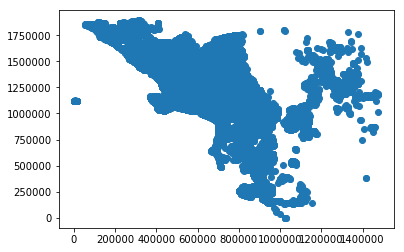

In [290]:
plt.scatter(ll.latitude,ll.longitude)